# Deep Learning Workbook

## Step 1: Define the Problem & Collect Data

**Q**: What are you trying to predict?<br/>
**A**: We're trying to classify movie reviews as positive and negative.

**Q**: What will your input data be?<br/>
**A**: Dataset of highly polarized reviews from the Internet Movie Database (IMDB).

**Q**: What type of problem are you facing?<br/>
**A**: Binary classification.

**Q**: What is the size of your dataset?<br/>
**A**: 25,000 reviews for training and 25,000 reviews for testing.

In [1]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(review):
    return ' '.join(reverse_word_index.get(i - 3, '?') for i in review)

print('Review Text:\n', decode_review(train_data[2]), 
      '\n\nLabel: ', 'Positive (1)' if train_labels[2] else 'Negative (0)')

Review Text:
 ? this has to be one of the worst films of the 1990s when my friends i were watching this film being the target audience it was aimed at we just sat watched the first half an hour with our jaws touching the floor at how bad it really was the rest of the time everyone else in the theatre just started talking to each other leaving or generally crying into their popcorn that they actually paid money they had ? working to watch this feeble excuse for a film it must have looked like a great idea on paper but on film it looks like no one in the film has a clue what is going on crap acting crap costumes i can't get across how ? this is to watch save yourself an hour a bit of your life 

Label:  Negative (0)


## Step 2: Pick Success Metrics

**Q**: What is your metric for success?<br/>
**A**: Accuracy

**Q**: What value of your success metric are you aiming for?<br/>
**A**: 95 %

## Step 3: Pick an Evaluation Protocol and Prepare Your Data

**Q**: What approach are going to follow for validation?<br/>
**A**: Hold out validation

**Q**: Does your data require reformatting, normalization or scaling?<br/>
**A**: Yes, Training samples are arrays of arbitrary length. We will convert them into one-hot vectors. The labels are 0 or 1, so we just need to convert them to floating point numbers.

**Q**: What is the training/validation/test split?
**A**: We will set apart 10000 samples from the training set for validation. That leaves 15000 samples for training, and 25000 samples for testing.

**Q**: Can/should the data be randomized before splitting?<br/>
**A**: Not required. The reviews are already in random order

**Q**: Can you come up with new features using existing ones to make the problem easier?<br/>
**A**: Not required.

In [3]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Reformat the training and test data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [4]:
# Reformat the training and test labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [5]:
# Separate the validation dataset
partial_x_train = x_train[:15000]
partial_y_train = y_train[:15000]
x_validation = x_train[15000:]
y_validation = y_train[15000:]

## Step 4: Develop the First Model

In [37]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_31 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [38]:
history = model.fit(
    partial_x_train, 
    partial_y_train,
    batch_size=512,
    epochs=20, 
    validation_data=(x_validation, y_validation))

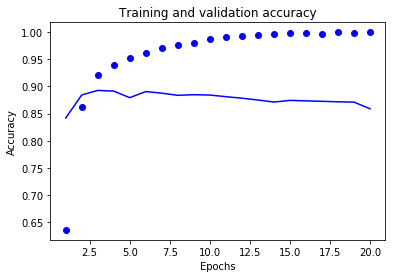

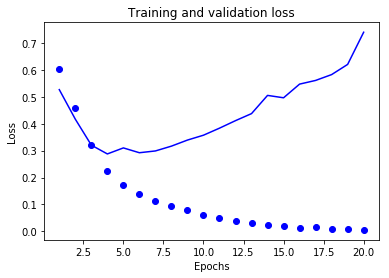

In [28]:
import matplotlib.pyplot as plt

acc = history.history['acc']
loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs[0:], acc[0:], 'bo', label='Training acc')
plt.plot(epochs[0:], val_acc[0:], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.margins(0.05)

plt.figure()

plt.plot(epochs[0:], loss[0:], 'bo', label='Training loss')
plt.plot(epochs[0:], val_loss[0:], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.margins(0.05)

plt.show()

## Step 5: Develop a Model That Overfits

In [31]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_28 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_7 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [39]:
history = model.fit(
    partial_x_train, 
    partial_y_train,
    batch_size=512,
    epochs=10, 
    validation_data=(x_validation, y_validation))

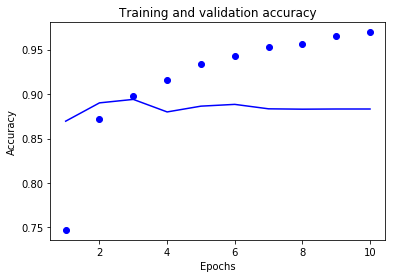

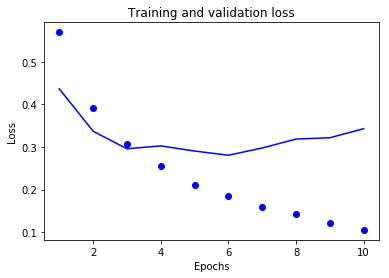

In [33]:
import matplotlib.pyplot as plt

acc = history.history['acc']
loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs[0:], acc[0:], 'bo', label='Training acc')
plt.plot(epochs[0:], val_acc[0:], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.margins(0.05)

plt.figure()

plt.plot(epochs[0:], loss[0:], 'bo', label='Training loss')
plt.plot(epochs[0:], val_loss[0:], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.margins(0.05)

plt.show()

## Step 6: Regularize the Model and Tune the Hyperparameters

In [6]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

In [34]:
history = model.fit(
    x_train, 
    y_train,
    batch_size=512,
    epochs=3)

Epoch 1/3
25000/25000 [==============================] - 1s 53us/step - loss: 0.2030 - acc: 0.9390
Epoch 2/3
25000/25000 [==============================] - 1s 53us/step - loss: 0.1662 - acc: 0.9506
Epoch 3/3
25000/25000 [==============================] - 1s 53us/step - loss: 0.1463 - acc: 0.9574


In [35]:
results = model.evaluate(x_test, y_test)
print(results)

25000/25000 [==============================] - 3s 105us/step
[0.37154377960205076, 0.87224000000000002]


In [36]:
model.save('../models/01_imdb_reviews.h5')